In [1]:
import os
import re
import shutil
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# 日本語フォントのインストール

* IPAex フォントをインストールする https://ipafont.ipa.go.jp/
* 他の日本語フォントでもいいんだけど macOS/ubuntu/Windows での相互運用を考えると IPAex が無難かな
* インストール方法は配布元に手順が書いてある
* どうしても IPAex フォントを OS にインストールしたくない場合は、Matplotlibのインストールディレクトリ (../lib/site-packages/matplotlib/mpl-data/fonts/ttf/) に ttf ファイルを置いてもいい

# 設定ファイル matplotlibrc のコピー
* matplotlib に日本語フォントを設定する
* プログラム中で明示的に設定することもできるが、設定ファイル matplotlibrc に設定するのが定石
* matplotlibrc　の優先順位

    1. カレントディレクトリ
    1. HOMEディレクトリ (~/.matplotlib)
    1. Matplotlibのインストールディレクトリ (../lib/site-packages/matplotlib/mpl-data/matplotlibrc)

* インストールディレクトリにある matplotlibrc をカレントディレクトリにコピーして、フォント設定を変更するのが (環境の再現性の点で) よかろう

In [2]:
currentdir = %pwd
print("1 Current Dir : {}".format(currentdir))
print("2 HOME    Dir : {}".format(mpl.get_configdir()))
print("Active matplotlibrc  : {}".format(mpl.matplotlib_fname()))

local_settings = os.path.join(currentdir, "matplotlibrc")
if not os.path.exists(local_settings) :
    shutil.copyfile(mpl.matplotlib_fname(), local_settings)
    print("Created : {}".format(local_settings))
else :
    print("Already exsists. do nothing : {}".format(local_settings))
    

1 Current Dir : /Users/atsushi/PycharmProjects/jupyter
2 HOME    Dir : /Users/atsushi/.matplotlib
Active matplotlibrc  : /Users/atsushi/PycharmProjects/jupyter/matplotlibrc
Already exsists. do nothing : /Users/atsushi/PycharmProjects/jupyter/matplotlibrc


# 設定ファイル matplotlibrc に IPAexGothic を追加
* font.family : IPAexGothic を　matplotlibrc に追記する

In [3]:
fin = open(local_settings)
lines = fin.readlines()
fin.close()

have_to_update = True
for line in lines :
    if re.match("font.family[ ]+:[ ]+IPAexGothic", line) :
        print ("\"{}\" was already written. Do nothing.".format(line.strip()))
        have_to_update = False
        break

if have_to_update :
    with open(local_settings, mode="w") as fout :
        for line in lines :
            if re.match("#[ ]*font.family[ ]+:[ ]+.*", line) :
                fout.write("font.family : IPAexGothic\n")
                print ("\"font.family : IPAexGothic\" was added before \"{}\"".format(line.strip()))
            
            fout.write(line)
        


"font.family : IPAexGothic" was already written. Do nothing.


# matplotlib のフォントキャッシュを削除
* ~/.matplotlib/fontList.json を削除する

In [4]:
font_list = os.path.join(mpl.get_configdir(), "fontList.json")
if os.path.exists(font_list) :
    os.remove(font_list)

# 設定の確認のため日本語が含まれるグラフを描画する

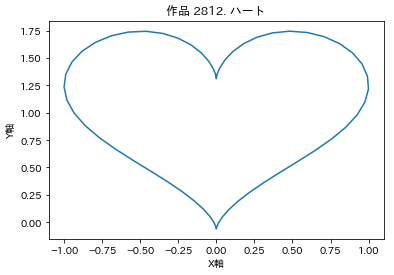

In [5]:
t = np.arange(0, 2 * np.pi, 0.1)
x = np.power(np.sin(t), 3);
y = 1.0 + 0.8125 * np.cos(t) - 0.3125 * np.cos(2 * t) - 0.125 * np.cos(3*t) - 0.0625 * np.cos(4*t)

plt.plot(x, y)
plt.xlabel("X軸")
plt.ylabel("Y軸")
plt.title("作品 2812. ハート")
plt.show()